# Titanic Machine Learning Project with Logistic Regression

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, I was asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Step 1: Import python packages and datasets

In [565]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
train_df = pd.read_csv('C:\\Users\\sidhp\\Desktop\\Python Files\\Github Projects\\Titanic\\train.csv')
test_df = pd.read_csv('C:\\Users\\sidhp\\Desktop\\Python Files\\Github Projects\\Titanic\\test.csv')

import warnings
warnings.filterwarnings("ignore")

### Step 2: Generate descriptive statistics using .head(), .describe(), and .info()

In [566]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [567]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [568]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Calling .info() on our dataframe has shown us that the embarked, age, and cabin columns are missing values

### Step 2: Finding missing values 

In [569]:
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [570]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%
Percent of missing "Age" records is 19.87%
Percent of missing "Embarked" records is 0.22%


The majority of Cabin values are missing; therefore, we can drop the column altogether. 

Most of the data for Age and Embarked columns exists in the dataset. 

We can fill the missing values in the age and embarked columns with metrics derived from the remaining data.

Text(0.5, 0, 'Age')

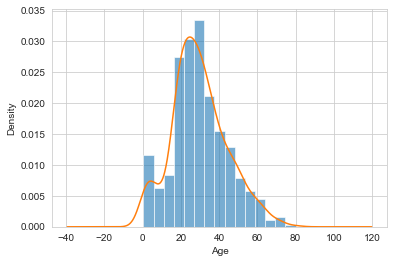

In [571]:
# Use a density plot to understand the distribution of the age data
train_df["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
train_df["Age"].plot(kind='density')
plt.xlabel('Age')

The age data is skewed to the right; therefore, using the mean might give us biased results. Instead, we'll use the median to impute the missing values

In [572]:
# Because the number of missing Embarked is miniscule, we can fill the NA values with the port most people boarded

In [573]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


### Step 3: Replacing null values

In [574]:
# Create new training dataset with filled values
train_fin = train_df.copy()

# Replacing null values in the training dataset
train_fin["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_fin["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_fin.drop('Cabin', axis=1, inplace=True)

# Create new testing dataset with filled values
test_fin = test_df.copy()

# Replacing null values in the testing dataset
test_fin["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_fin["Embarked"].fillna(test_df['Embarked'].value_counts().idxmax(), inplace=True)
test_fin.drop('Cabin', axis=1, inplace=True)

### Step 4: Exploratory data analysis

In [575]:
# Percentage of passengers that survived
train_fin['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

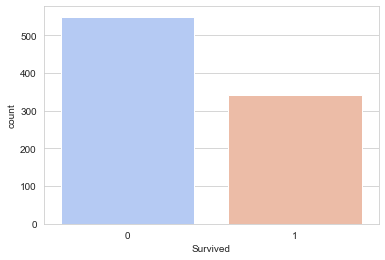

In [576]:
sns.countplot(train_fin['Survived'],palette='coolwarm')

In [577]:
# Percentage of passengers that survived split by class
train_fin['Survived'].groupby(train_fin['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

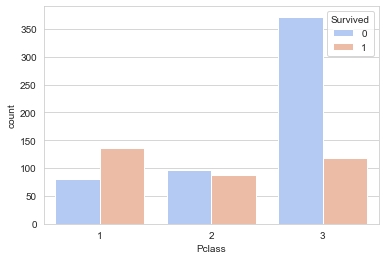

In [578]:
sns.countplot(train_fin['Pclass'], hue=train_fin['Survived'],palette='coolwarm')

We can see that passengers from class 1 had the largest survival rate

In [579]:
# Percentage of males and females onboard
train_fin['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [580]:
# Percentage of females and males that survived
train_fin['Survived'].groupby(train_fin['Sex']).value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

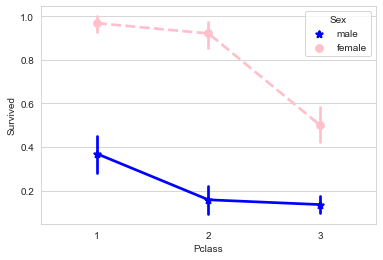

In [581]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_fin,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [582]:
# Percentage of survivors that were male or female
train_fin['Sex'].groupby(train_fin['Survived']).value_counts(normalize=True)[1]

Sex
female    0.681287
male      0.318713
Name: Sex, dtype: float64

Females had a larger survival rate than males

In [583]:
# Split passengers into age groups and find survival rate for each age group
train_fin['Survived'].groupby(pd.cut(train_fin['Age'],5)).mean()

Age
(0.34, 16.336]      0.550000
(16.336, 32.252]    0.344168
(32.252, 48.168]    0.404255
(48.168, 64.084]    0.434783
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64

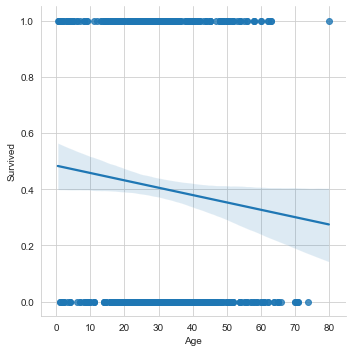

In [584]:
sns.lmplot('Age', 'Survived', data=titanic_df)

Minors had the largest survival rate

We will add a flag to identify minors in our datasets


In [585]:
train_fin['IsMinor']=np.where(train_fin['Age']<=16, 1, 0)

test_fin['IsMinor']=np.where(test_fin['Age']<=16, 1, 0)

In [586]:
train_fin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsMinor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


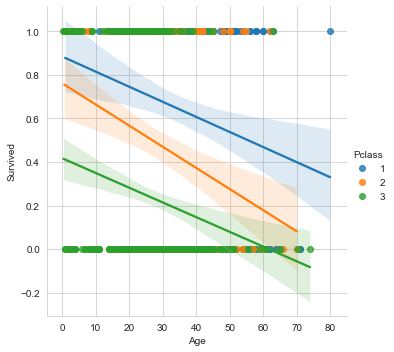

In [587]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=train_fin)

Both SibSp and Parch relate to traveling with family; therefore, to account for possible multicollinearity and create a stronger predictor, we can combine the effect of these variables into one categorical predictor: whether the passenger was traveling alone.

In [588]:
## Create categorical variable for traveling alone
train_fin['WithFam']=np.where((train_fin["SibSp"]+train_fin["Parch"])>0, 1, 0)
train_fin.drop('SibSp', axis=1, inplace=True)
train_fin.drop('Parch', axis=1, inplace=True)

# Make the same changes in the test dataset
test_fin['WithFam']=np.where((test_fin["SibSp"]+test_fin["Parch"])>0, 1, 0)
test_fin.drop('SibSp', axis=1, inplace=True)
test_fin.drop('Parch', axis=1, inplace=True)

In [589]:
# Surival rate of passengers with family  
train_fin['Survived'].groupby(train_fin['WithFam']).mean()

WithFam
0    0.303538
1    0.505650
Name: Survived, dtype: float64

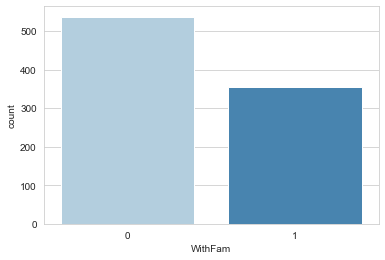

In [590]:
# Number of passengers traveling with family
sns.countplot('WithFam', data=train_fin, palette='Blues')

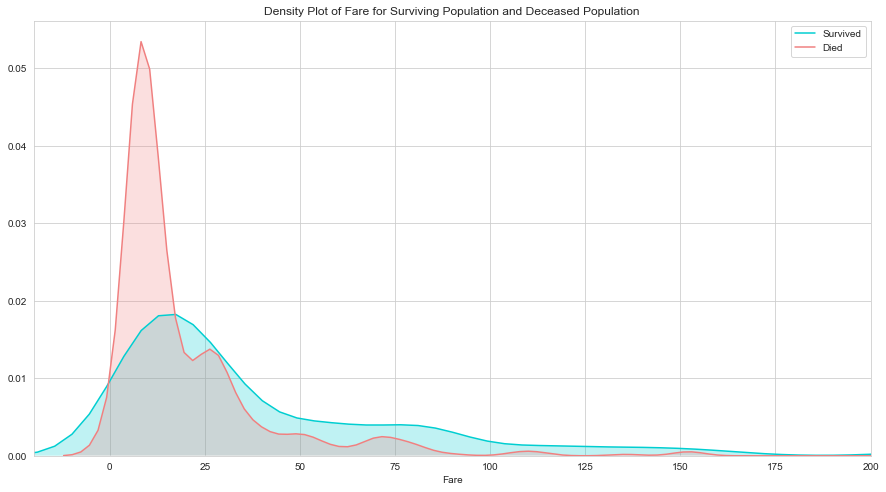

In [591]:
# Exploring the fare variable
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_fin["Fare"][train_fin.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_fin["Fare"][train_fin.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

The distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class.

In [592]:
# Avg fare price per class
train_fin['Fare'].groupby(train_fin['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

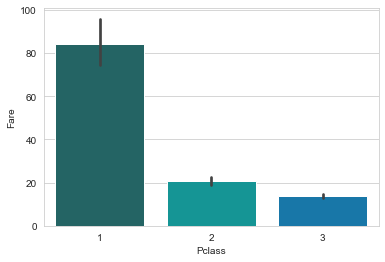

In [593]:
sns.barplot(x="Pclass", y="Fare", data=train_fin, palette = 'winter_d' )

### Step 4: Prepping additional variables

Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked") are categorical variables.

Therefore, we must transform our dataset to account for them.

Furthermore, we must drop the PassengerId column because it only serves as an index and we don't want it to be taken into account.

We must also drop the Sex_female variable to avoid multicollinearity.

In [594]:
#create categorical variables and drop variables
train_fin=pd.get_dummies(train_fin, columns=["Pclass","Embarked","Sex"])
train_fin.drop('Sex_female', axis=1, inplace=True)
train_fin.drop('PassengerId', axis=1, inplace=True)
train_fin.drop('Name', axis=1, inplace=True)
train_fin.drop('Ticket', axis=1, inplace=True)


test_fin=pd.get_dummies(test_fin, columns=["Pclass","Embarked","Sex"])
test_fin.drop('Sex_female', axis=1, inplace=True)
#test_fin.drop('PassengerId', axis=1, inplace=True)
test_fin.drop('Name', axis=1, inplace=True)
test_fin.drop('Ticket', axis=1, inplace=True)


In [595]:
train_fin.head()

,Survived,Age,Fare,IsMinor,WithFam,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,1,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,1,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,1,0,0,0,0,1,0
4,0,35.0,8.0500,0,0,0,0,1,0,0,1,1


### Step 5: Logistic Regression and Results 

Create a target array and drop the Survived column from the training dataset

In [596]:
X = train_fin.copy()

Y =  X.Survived

X.drop('Survived', axis=1, inplace=True)

In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called ravel

In [597]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Let's start by initiating the model

In [598]:
#Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.8047138047138047

##### Looks like we got a ~81% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of passengers who survived. This is known as checking the null error rate.

In [599]:
# Check percentage of survivors
print('Percent of surviving passengers is %.2f%%' %(Y.mean()))
print('Percent of deceased passengers is %.2f%%' %(1-Y.mean()))

Percent of surviving passengers is 0.38%
Percent of deceased passengers is 0.62%


This means that if our model just simply guessed "deceased" or 0 for all passengers we would have had 1-0.32=0.68 accuracy or 68% accuracy. 

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [600]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [601]:
coeff_df

,0,1
0,Age,[-0.02097898209343534]
1,Fare,[0.0011210331459729328]
2,IsMinor,[0.5841198240595876]
3,WithFam,[-0.10163092270077578]
4,Pclass_1,[1.3699453678071103]
5,Pclass_2,[0.55425226557729]
6,Pclass_3,[-0.6997284794808319]
7,Embarked_C,[0.5915547777296393]
8,Embarked_Q,[0.5576061436184563]
9,Embarked_S,[0.07530823255545911]


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of surviving while a negative coefficient means it corresponds to a decreased likelihood of surviving as the actual data value point increases.

Being a a minor and being in first class is heavily associated with survival, while being a male and being in third class is heavily associated with dying.

### Step 6: Predicting test.csv outcomes

In [602]:
test_fin.isnull().sum()

PassengerId    0
Age            0
Fare           1
IsMinor        0
WithFam        0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [603]:
test_fin['Fare'] = test_fin['Fare'].fillna((test_fin['Fare']).mean())

In [604]:
test_fin.head()

,PassengerId,Age,Fare,IsMinor,WithFam,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,892,34.5,7.8292,0,0,0,0,1,0,1,0,1
1,893,47.0,7.0000,0,1,0,0,1,0,0,1,0
2,894,62.0,9.6875,0,0,0,1,0,0,1,0,1
3,895,27.0,8.6625,0,0,0,0,1,0,0,1,1
4,896,22.0,12.2875,0,1,0,0,1,0,0,1,0


In [605]:
ids = test_fin['PassengerId']
test_fin=test_fin.drop('PassengerId', axis=1)
predictions = log_model.predict(test_fin)


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
